Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]

Finite approximation: f' = [-f(x-0.5h) + f(x+0.5h)] / [h^1]

Boundary conditions and initial conditions may be in conflict for field Temperature
Conflicting values override and become equal to whatever was assigned last

CFL: 0.454, must be under 0.5 for stability

All initial conditions set!



interactive(children=(Dropdown(description='Field', options=('Temperature Flux', 'Temperature', 'Temperature d…

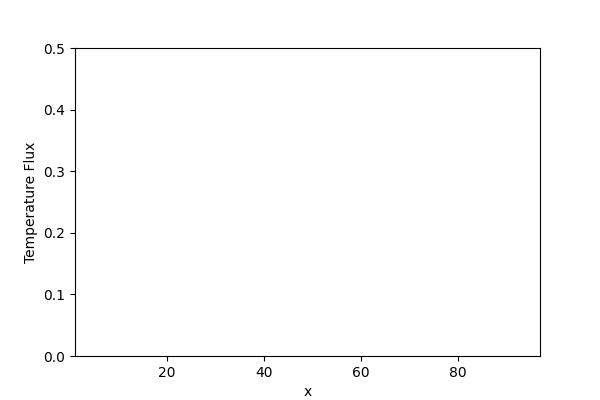

In [24]:
%matplotlib widget
m = FD.Model({"x": range(1,100,4), "t": range(1,1000)}, time_axis = "t")

T = FD.Field(m, "Temperature", n_time_ders = 1)
Tflux = FD.Field(m, "Temperature Flux", n_time_ders = 0, edge_axes = "x")

cell_to_edge = FD.Stencil([-1/2,1/2],der_order=1,axis_type="cell",der_axis_type="edge")
edge_to_cell = FD.Stencil([-1/2,1/2],der_order=1,axis_type="edge",der_axis_type="cell")

T.set_IC("1")
T.set_BC("0","x","start")
Tflux.set_BC("0","x","end")

k = 2 # thermal conductivity

CFL = k*dt/dx**2
print(f"CFL: {round(CFL,3)}, must be under 0.5 for stability\n")


m.check_IC() # not required, but recommended: check's if all necessary initial conditions have been set up
while not m.finished:

    dTdx = cell_to_edge.der(T.prev,"x")

    Tflux.assign_update(k * dTdx)

    Tp = edge_to_cell.der(Tflux.new,"x")

    T.dot.assign_update(Tp)

    T.time_integrate_update()

    m.increment_time()

m.interact() # creates an interactive visual in a jupyter notebook

# get numpy arrays of the temperature and temperature flux:
#Tflux.data
#T.data   